In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)

In [3]:
objpoints = []
imgpoints = []

images = glob.glob('calibration_wide/*jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corner = cv2.findChessboardCorners(gray, (8,6), cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corner)
        
        cv2.drawChessboardCorners(img, (8,6), corner, ret)
        #plt.imshow(img)
        #plt.show(block=True)

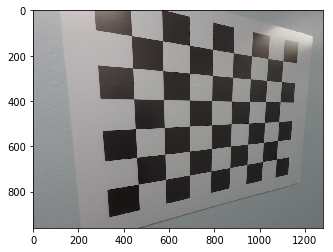

In [4]:
import pickle
%matplotlib inline

img = cv2.imread('calibration_wide/GOPR0032.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)
plt.show(block=True)

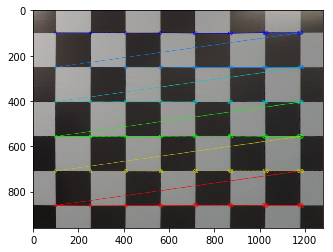

In [5]:
gray_image = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

ret, corners = cv2.findChessboardCorners(gray_image, (8,6), None)

if ret == True:
    cv2.drawChessboardCorners(dst, (8,6), corners, ret)
    offset = 100
    img_size = (gray_image.shape[1], gray_image.shape[0])
    nx = 8
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    dst1 = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
    M = cv2.getPerspectiveTransform(src, dst1)
    warped = cv2.warpPerspective(dst, M, img_size)
    
    plt.imshow(warped)